In [1]:
#1.The file (apple.2011.csv) has 3 columns: date, price, and percent change.  The information you are really interested in is the percent change.  This value is the percent change in the price from the previous date to the date on the corresponding row.
#2. Use the percent change values to create a Gaussian random number generator.  This generator will create Gaussian-distributed randoms to use as hypothetical percent changes on the day to day price of Apple stock.
#3. With that generator, create 20 random numbers.  With these randoms, you can find a potential price change over 20 days.
#4. Start with the price from the last row and the random numbers to determine a hypothetical price after 20 days.  To do this, take that last price, apply a percent change and get a new price.  Then take that new price, and apply the next percent change.  Do this for the 20 randoms, and get a final price.
#5. Store the final price after 20 days (you can discard the intermediate price values).
#6. Repeat steps 3-5 a very large number of times.  Something like 10000.  Each run will yield a different result.
#7. Take all of the stored prices (10000 or so), sort them, and find the 1% lowest percentile.  This value is the final result, and represents the VaR with 99% confidence.  This means that the price will be above this result after 20 days with a confidence level of 99%
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
import matplotlib
matplotlib.style.use('ggplot')
stockdata=pd.read_csv('apple.2011.csv',header=0, names=['date','close price','p_change'],index_col=0, parse_dates=True)

In [2]:
stockdata.head(n=10)

,close price,p_change
date,,
2011-01-03,329.570,XXXXX
2011-01-04,331.290,0.005218922
2011-01-05,334.000,0.008180144
2011-01-06,333.730,-0.000808383
2011-01-07,336.120,0.007161478
2011-01-10,342.455,0.018847435
2011-01-11,341.640,-0.002379875
2011-01-12,344.420,0.00813722
2011-01-13,345.680,0.003658324


In [3]:
stockdata.tail(n=10)

,close price,p_change
date,,
2011-12-16,381.020,0.005488996
2011-12-19,382.210,0.003123196
2011-12-20,395.950,0.035948824
2011-12-21,396.445,0.001250158
2011-12-22,398.550,0.00530969
2011-12-23,403.330,0.011993476
2011-12-27,406.530,0.00793395
2011-12-28,402.640,-0.00956879
2011-12-29,405.120,0.006159348


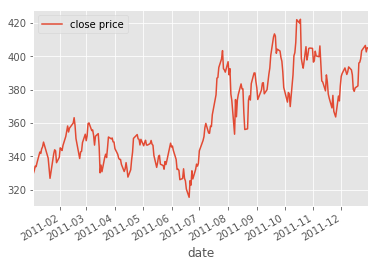

In [4]:
stockdata.plot()

In [5]:
stockdata['p_change']=stockdata['p_change'].str.replace('XXXXX','NaN')
stockdata['p_change']=pd.to_numeric(stockdata['p_change'],errors='coerce')
stockchange=pd.DataFrame(stockdata['p_change'])

In [6]:
#stockchange.columns['p_change']
stockchange.head(n=10)

,p_change
date,
2011-01-03,NaN
2011-01-04,0.005219
2011-01-05,0.008180
2011-01-06,-0.000808
2011-01-07,0.007161
2011-01-10,0.018847
2011-01-11,-0.002380
2011-01-12,0.008137
2011-01-13,0.003658


In [7]:
stockdata.tail(n=20)

,close price,p_change
date,,
2011-12-02,389.700,0.004563
2011-12-05,393.010,0.008494
2011-12-06,390.950,-0.005242
2011-12-07,389.090,-0.004758
2011-12-08,390.660,0.004035
2011-12-09,393.620,0.007577
2011-12-12,391.840,-0.004522
2011-12-13,388.810,-0.007733
2011-12-14,380.190,-0.022170


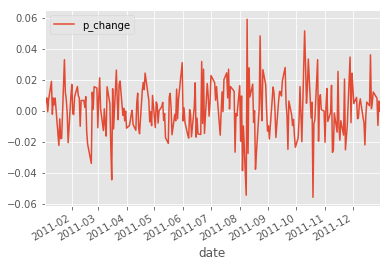

In [8]:
stockchange.plot()

Mean and Std Deviation
[ 0.01652056] [ 0.00095736]


(array([  1.,   9.,  15.,  28.,  58.,  70.,  59.,  40.,  11.,   9.]),
 array([-0.04826724, -0.03926808, -0.03026893, -0.02126977, -0.01227062,
        -0.00327146,  0.0057277 ,  0.01472685,  0.02372601,  0.03272517,
         0.04172432]),
 <a list of 10 Patch objects>)

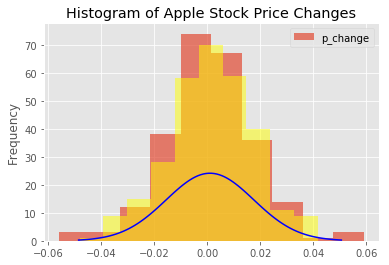

In [9]:
#plot returns and histogram of estimated results
#reference https://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution
mu = stockchange.mean().as_matrix(columns=['p_change'])
s = stockchange.std().as_matrix(columns=['p_change'])
#s=s.as_matrix(columns=['p_change'])
print "Mean and Std Deviation"
print s, mu
x =np.linspace(mu-3*s,mu+3*s, 100)
#initial simulation
np.random.seed(10)
sim1=np.random.normal(mu,s,300)
#plot the figure
plt.figure()
stockchange.plot.hist(alpha=0.7,bins=10,title='Histogram of Apple Stock Price Changes')
plt.plot(x,stats.norm.pdf(x,mu,s),color='blue')
plt.hist(sim1,bins=10, color='yellow',alpha=0.5,label='simulation')

In [10]:
#generate 20 days of simulated returns
sim2=np.random.normal(mu,s,20)
print sim2
sim2=1+sim2
print sim2

[  1.34353307e-02   1.54869481e-02  -3.00685634e-03  -1.05253672e-02
  -6.83043640e-03   6.73089989e-03   2.75795262e-02   4.91137303e-03
   8.96986843e-03  -2.64437172e-02   4.52309643e-02  -1.72734443e-02
   3.09881351e-02  -8.22885620e-03   1.67792777e-02   1.44252544e-02
   2.01994747e-03  -1.79175410e-03  -1.45836936e-02   7.19442242e-05]
[ 1.01343533  1.01548695  0.99699314  0.98947463  0.99316956  1.0067309
  1.02757953  1.00491137  1.00896987  0.97355628  1.04523096  0.98272656
  1.03098814  0.99177114  1.01677928  1.01442525  1.00201995  0.99820825
  0.98541631  1.00007194]


In [11]:
#calculate the change in price over the last 20 days
#reference, https://stackoverflow.com/questions/2104782/returning-the-product-of-a-list
def calcprice(list,price):
    change=reduce(lambda x,y: x*y,list)
    return change*price

In [12]:
print calcprice(sim2,100)

109.949138352


In [13]:
# extract the end of the year price
lastprice=stockdata['close price'][251]
print lastprice

405.0


In [14]:
# simulate the price after 20 days
print calcprice(sim2,lastprice)

445.294010325


In [15]:
#define a simulator function 
def simulator(num,price,days,mean,sd):
    runs=np.zeros(num)
    changes=np.zeros(days)
    for x in range(0,num):
        changes=np.random.normal(mean,sd,days)
        changes=1+changes
        runs[x]=calcprice(changes,price)
    return runs

In [16]:
# run the simulations
var_results=simulator(10000,lastprice,20,mu,s)
var_results=pd.DataFrame(var_results)
var_results.columns=['simulation']
var_results.head(n=5)

,simulation
0,418.535594
1,438.053120
2,403.596433
3,410.062284
4,387.308105


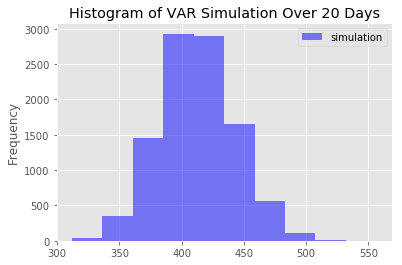

In [17]:
plt.figure()
var_results.plot.hist(alpha=0.5,bins=10,color='blue',title='Histogram of VAR Simulation Over 20 Days')
#plt.plot(x,stats.norm.pdf(x,mu,s),color='blue')
#plt.hist(var_results,bins=10, color='yellow',alpha=0.5,title=)

In [18]:
#calculate quantiles of the VAR
var_results.quantile([0.01,0.05,0.1])

,simulation
0.01,347.228966
0.05,364.664223
0.10,374.581720
